<a href="https://colab.research.google.com/github/BaraahAbuAbadi/Bike_Rides_in_SF_Part_A/blob/main/Bike_Rides_in_SF_Part_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pilot Project: Bike Rides in San Francisco

© 2023, Zaka AI, Inc. All Rights Reserved.

---


###**Case Study:** Analyzing & Forecasting the number of bike rides in San Francisco
**Objective:** The goal of this challenge is to let you dive deep into time-series signals, analyze it and determine the best predictive model.
The challenge is divided into 2 parts:

* **Part A:** You will use time-series data of the number of bike rides in San Fransisco and analyze it to better understand it and choose one of the statistical models you learned during the week to predict future values.

* **Part B:** You will prepare the same data and structure it in order to train an RNN to predict the number of bike rides for the next 7 days.


##Part A: Time-series analysis and forecasting



## Time-series Analysis



### Importing the libraries
Before loading the data, import pandas library and matplotlib.

In [1]:
# Test Your Zaka
import pandas as pd
import matplotlib.pyplot as plt


### Data Loading & Visualization
Start by loading the dataset and visualize it **in terms of the date** before performing any analysis.

In [2]:
# Test Your Zaka
Dataset= pd.read_csv('/content/Bike Rides aggregated.csv')
Dataset.shape

(552, 2)

<Axes: xlabel='date'>

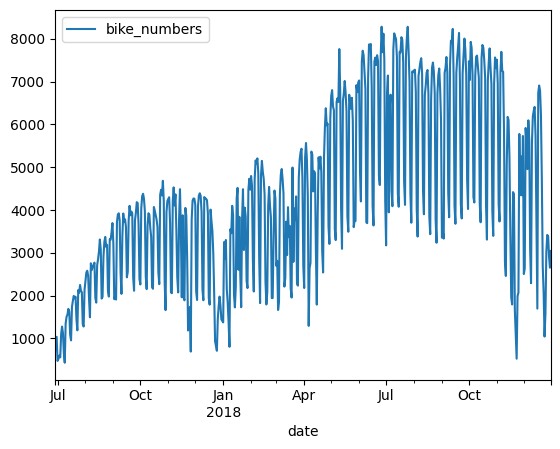

In [3]:
#let's rest the data to be the index ad plot the signal again
Dataset['date'] = pd.to_datetime(Dataset['date'])
Dataset = Dataset.set_index('date')
Dataset.plot()

Notice how the number of bike rides is maximum during July and October 2018 and minimum during January 2018.

### Data Decomposition
The statsmodels library provides an implementation of the decomposition method in a function called seasonal_decompose(). Use it to decompose your data and specify the model to be additive.



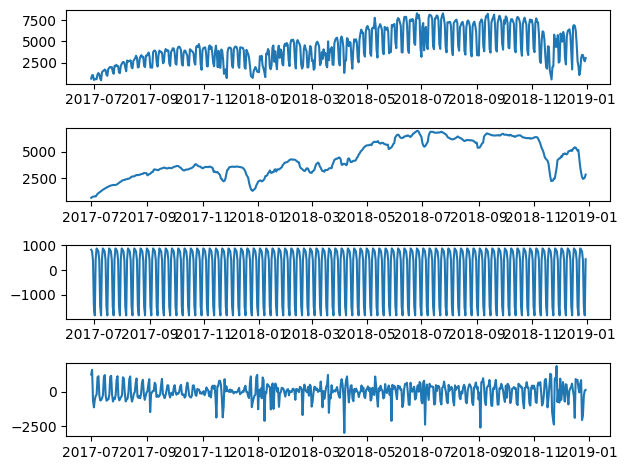

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(Dataset, model='additive')
Trend_mul = result_mul.trend
Seasonality_mul = result_mul.seasonal
Residual_mul = result_mul.resid
Observed_mul = result_mul.observed

plt.subplot(411)
plt.plot(Observed_mul)

plt.subplot(412)
plt.plot(Trend_mul)

plt.subplot(413)
plt.plot(Seasonality_mul)

plt.subplot(414)
plt.plot(Residual_mul)

plt.tight_layout()





1. Do you observe any trend in the Data?
2. Is there a seasonality pattern?

**the data exihibts both strong trend and clear seasonality**

### Autocorrelation
To better understand time-series, we need to study its autocorrelation which gives us an idea on how lags are affecting current/future values.
Use the Autocorrelation function from the statsmodel library and try few values for the number of lags.

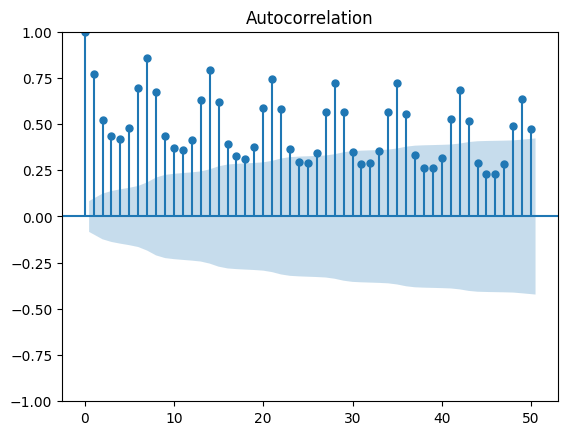

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
plot_acf(x = Dataset, lags=50)
plt.show()


Analyze the autocorrelation plot and check if:
- the data is stationary
- there is a seasonal pattern

**The data is not stationary but it is a seasonal pattern
**

### Partial Autocorrelation
Use the function provided by the statsmodels library to study the partial autocorrelation of the TS signal and set the number of lags to 25.

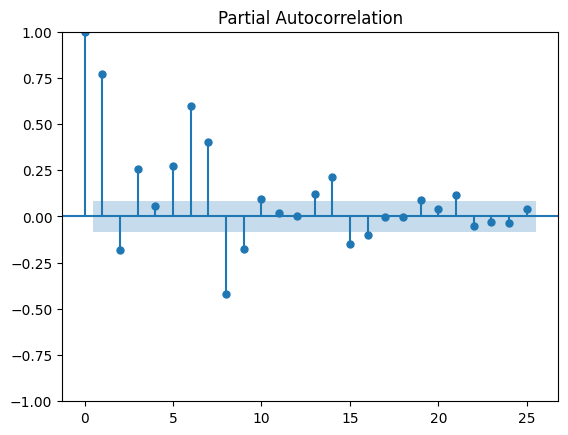

In [6]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
plot_pacf(Dataset, lags=25)
plt.show()

## Time-series Forecasting
The goal of this section is to use the previous analysis to determine which of the statistical models you learned through the week.



### Simple moving average

Start by applying a simple moving average filter on the data with a window of size 20.

In [7]:
from sklearn.metrics import mean_squared_error
import math as sqrt


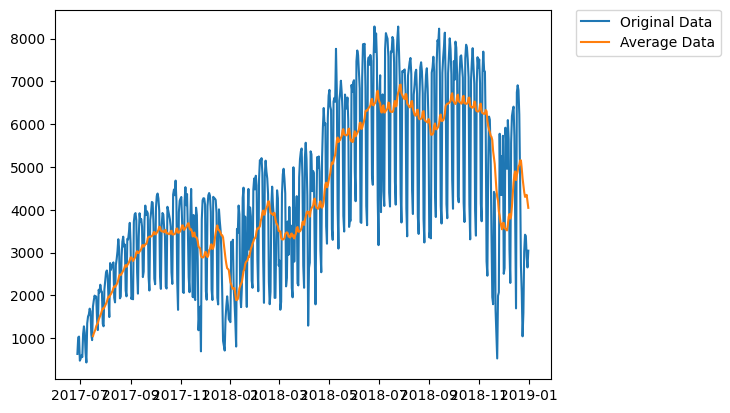

In [8]:
avg_data = Dataset.rolling(window=20).mean()
plt.plot(Dataset, label='Original Data')
plt.plot(avg_data, label='Average Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

To better see the effect of the moving average filter:
- set the first 400 days for training and the rest for testing
- copy the dataframe and add a column to the predicted value with window size of 2

In [9]:
train_len = 400
train = Dataset[0:train_len]
test = Dataset[train_len:]

y_hat_sma = Dataset.copy()
ma_window = 2
y_hat_sma['sma_forecast']= Dataset['bike_numbers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'] = round(y_hat_sma['sma_forecast'])


Now let's plot the training, testing data, and the predictions made by the simple moving average on the same graph.

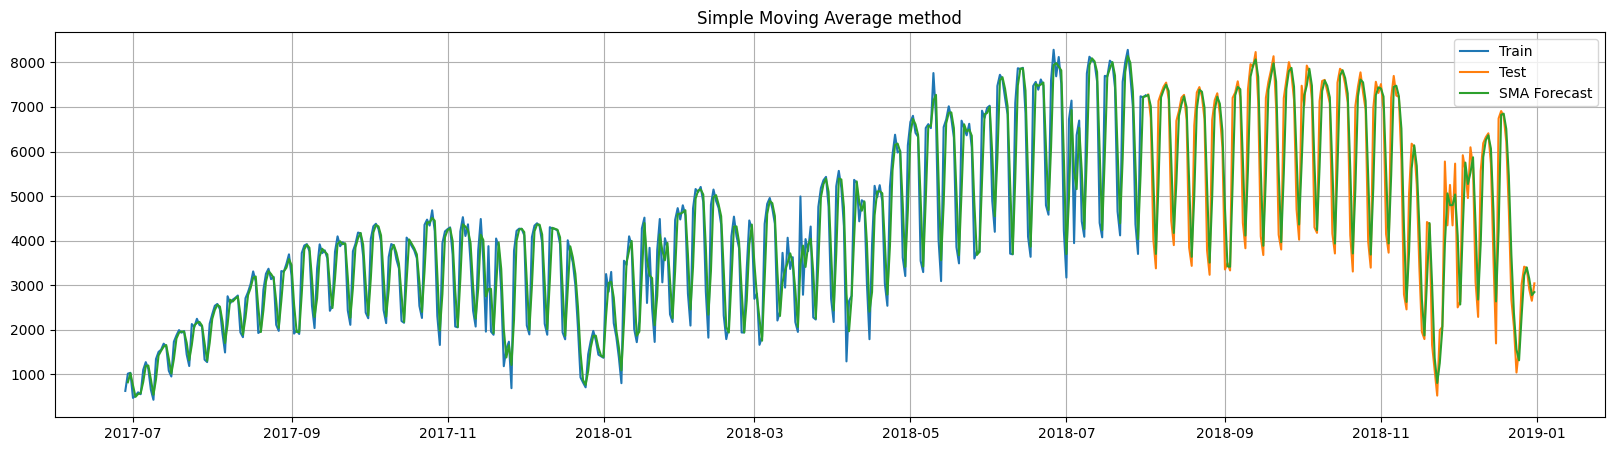

In [10]:
plt.figure(figsize=(20, 5))
plt.grid()
plt.plot(train['bike_numbers'], label='Train')
plt.plot(test['bike_numbers'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='SMA Forecast')
plt.legend(loc = 'best')
plt.title('Simple Moving Average method')
plt.show()


### Statistical models


- Check if the TS is stationary using the ADF test and/or some statistical measures
- if the data is non-stationary, transform it into a stationary signal and confirm your results again
- explain why each of the statistical models is a good/bad model to forecast future values of the number of bike rides.
- if the results are not satisfying, resonate why

**Share Your Zaka**

<Axes: xlabel='date'>

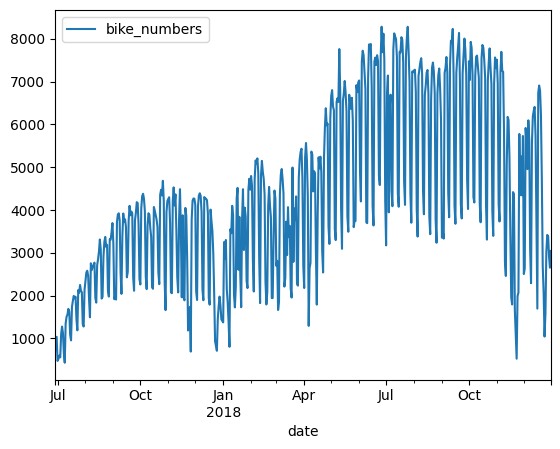

In [11]:
Dataset.plot()


In [12]:
#summary statistics
split = round(len(Dataset)/2)
X1, X2 = Dataset[0:split], Dataset[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=3006.913043, mean2=5628.670290
variance1=1482065.054229, variance2=3639977.719987


<ipython-input-12-1486dab6e8a6>:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('mean1=%f, mean2=%f' % (mean1, mean2))
<ipython-input-12-1486dab6e8a6>:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('variance1=%f, variance2=%f' % (var1, var2))


In [13]:
#Statistical test (ADF)
from statsmodels.tsa.stattools import adfuller
result = adfuller(Dataset.iloc[:,0].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.130982
p-value: 0.232241
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


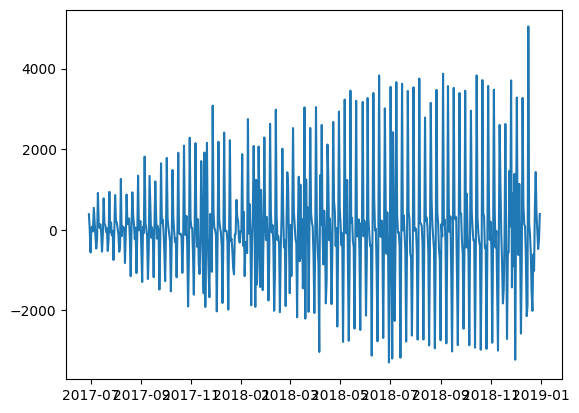

In [14]:
#Differncing
diff = Dataset.diff()
pyplot.plot(diff)
pyplot.show()



In [15]:
diff

,bike_numbers
date,
2017-06-28,NaN
2017-06-29,387.0
2017-06-30,19.0
2017-07-01,-563.0
2017-07-02,48.0
...,...
2018-12-27,395.0
2018-12-28,-32.0
2018-12-29,-478.0


In [16]:
diff.dropna(inplace=True)
diff

,bike_numbers
date,
2017-06-29,387.0
2017-06-30,19.0
2017-07-01,-563.0
2017-07-02,48.0
2017-07-03,77.0
...,...
2018-12-27,395.0
2018-12-28,-32.0
2018-12-29,-478.0


In [17]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(diff.iloc[:,0].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -7.362237
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


<Axes: xlabel='date'>

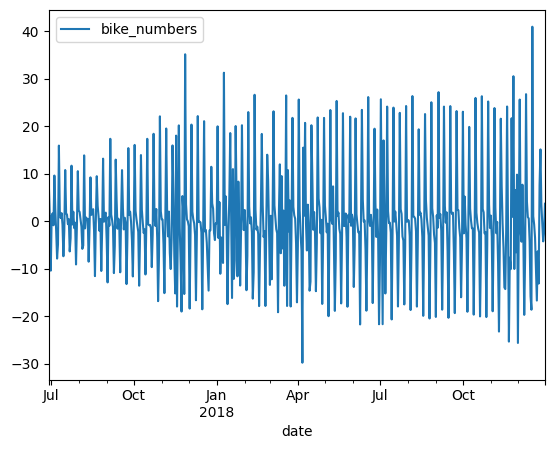

In [18]:
#Logarithmic transform
import numpy as np
TS_log = np.sqrt(Dataset)
TS_log = TS_log.diff().dropna()
TS_log.plot()


In [19]:
#check stationarity
result = adfuller(TS_log.iloc[:,0].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.477284
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


Text(0.5, 1.0, 'Partial Autocorrelation')

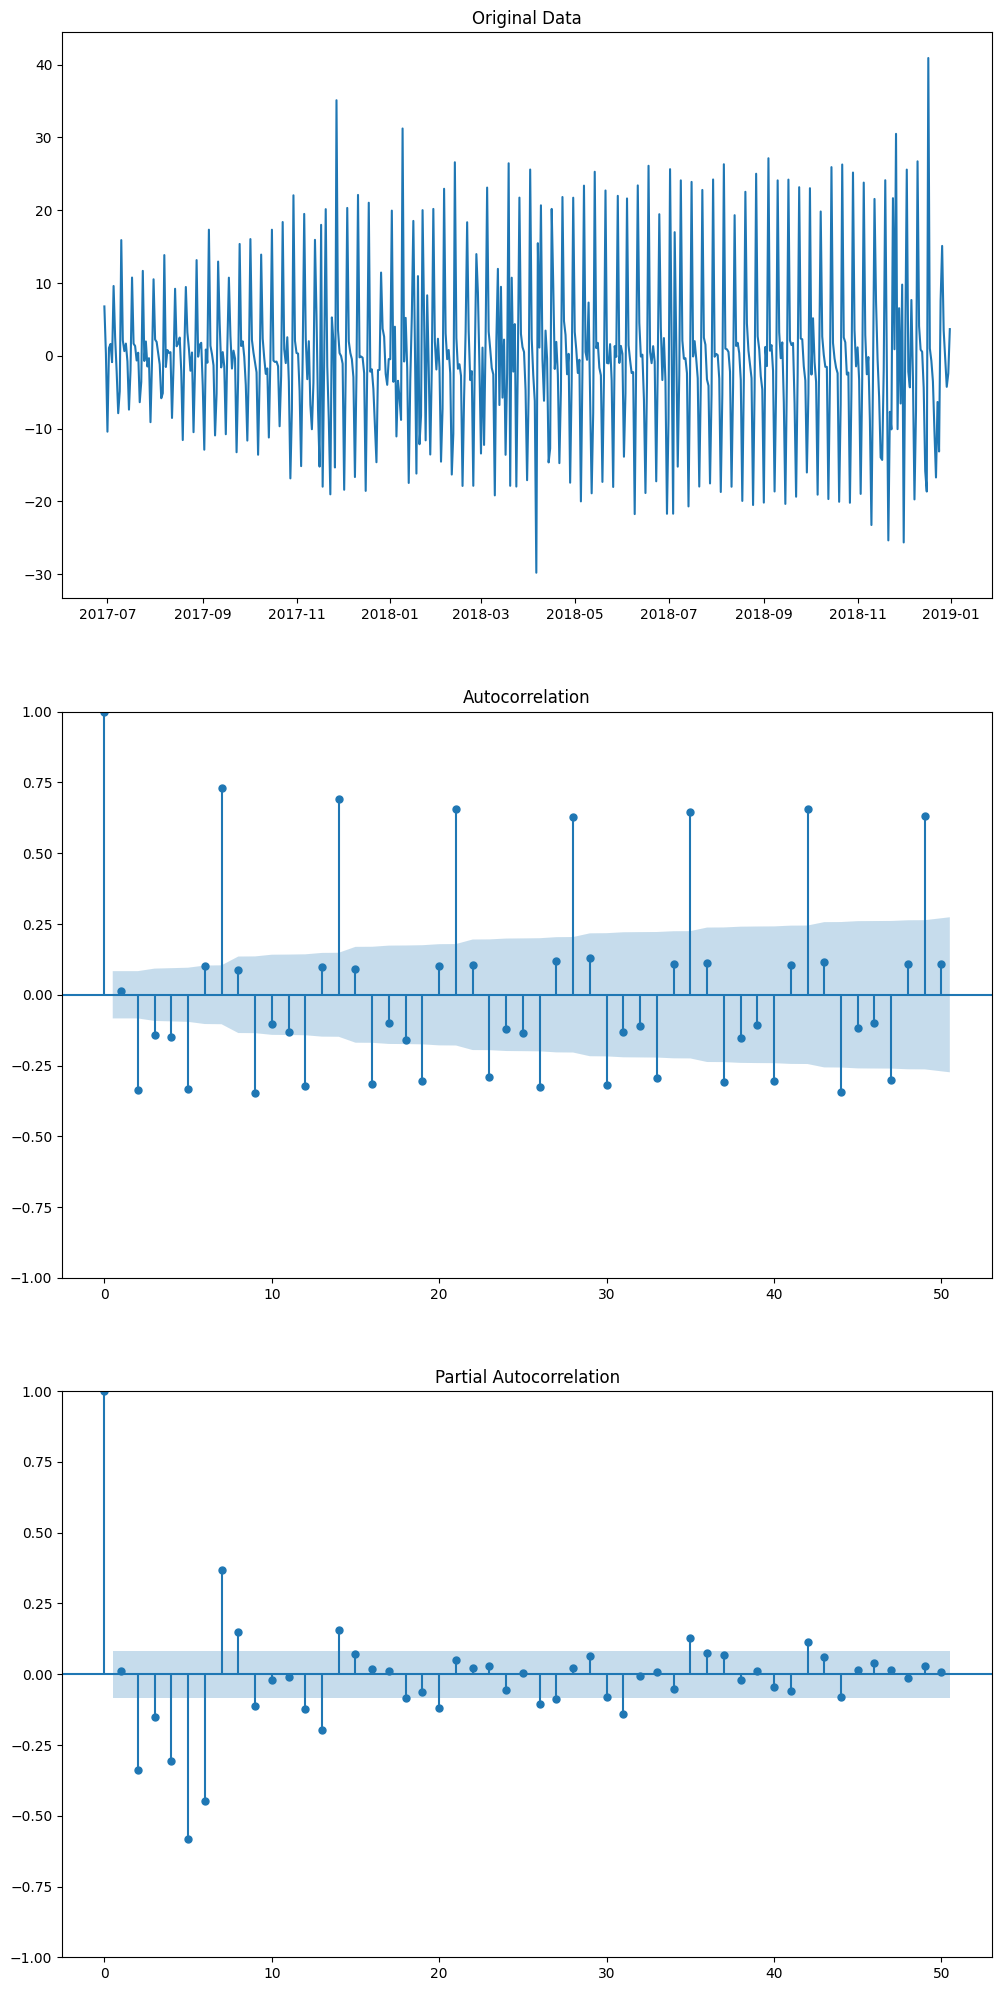

In [20]:
#Statistica Model
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=False,sharey=False , figsize=(12, 25))

ax = axes.ravel()
ax[0].plot(TS_log)
ax[0].set_title('Original Data')

fig = plot_acf(x= TS_log, lags= 50, ax=ax[1])
ax[1].set_title('Autocorrelation')

fig = plot_pacf(TS_log,lags= 50, ax=ax[2])
ax[2].set_title('Partial Autocorrelation')

In [21]:
train_len = 400
train = TS_log[0:train_len]
test = TS_log[train_len:]


In [22]:
#Autoregressive model
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(train, lags=20).fit()



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [23]:
#Make the prediction
pred = ar_model.predict(start=test.index.min(), end=test.index.max())
pred = round(pred)
pred

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


,0
2018-08-03,-4.0
2018-08-04,-15.0
2018-08-05,-3.0
2018-08-06,20.0
2018-08-07,3.0
...,...
2018-12-27,-0.0
2018-12-28,-6.0
2018-12-29,-6.0
2018-12-30,1.0


In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test, pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 8.785


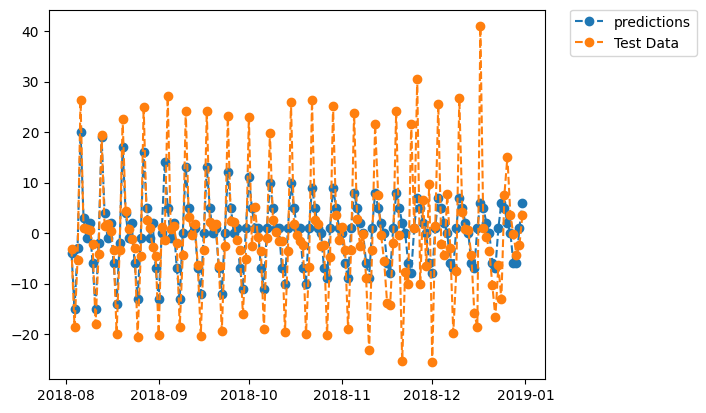

In [25]:
plt.plot(pred, linestyle='--', marker= 'o', label = 'predictions')
plt.plot(test, linestyle='--', marker= 'o', label = 'Test Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [26]:
!pip3 uninstall statsmodels -y
!pip3 install numpy scipy patsy pandas
!pip3 install statsmodels


Found existing installation: statsmodels 0.14.4
Uninstalling statsmodels-0.14.4:
  Successfully uninstalled statsmodels-0.14.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 43.6 MB/s eta 0:00:00


In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sqrt
from sklearn.metrics import mean_squared_error

# Fit the SARIMAX model
MAmodel = SARIMAX(train, order=(0, 0, 7)).fit()

# Generate predictions
MApred = MAmodel.predict(start=test.index.min(), end=test.index.max())

# Round predictions if needed
MApred = round(MApred)

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, MApred))
print('Test RMSE: %.3f' % rmse)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Test RMSE: 12.579


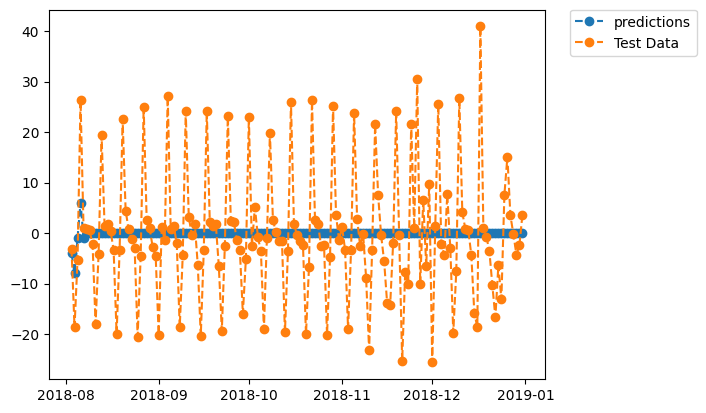

In [28]:
plt.plot(MApred, linestyle='--', marker= 'o', label = 'predictions')
plt.plot(test, linestyle='--', marker= 'o', label = 'Test Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [33]:
ARMAmodel = SARIMAX(TS_log, order=(20, 0, 7)).fit()

# Generate predictions
ARMApred = ARMAmodel.predict(start=test.index.min(), end=test.index.max())

# Round predictions if needed
ARMApred = round(ARMApred)

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, ARMApred))
print('Test RMSE: %.3f' % rmse)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 7.184


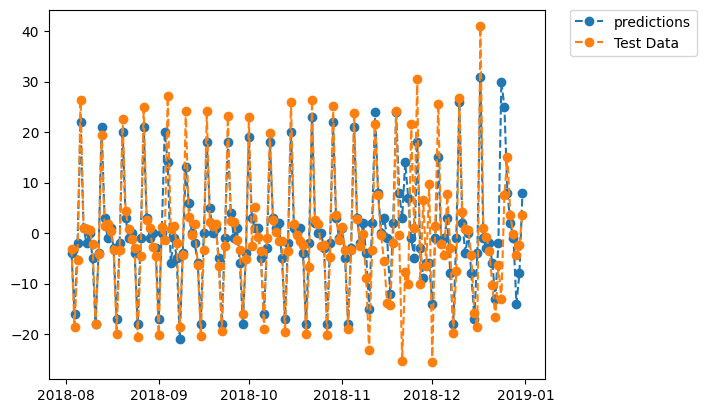

In [34]:
plt.plot(ARMApred, linestyle='--', marker= 'o', label = 'predictions')
plt.plot(test, linestyle='--', marker= 'o', label = 'Test Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [35]:
ARIMAmodel = SARIMAX(TS_log, order=(20, 2, 7)).fit()

# Generate predictions
ARIMApred = ARMAmodel.predict(start=test.index.min(), end=test.index.max())

# Round predictions if needed
ARIMApred = round(ARIMApred)

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, ARIMApred))
print('Test RMSE: %.3f' % rmse)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 7.184


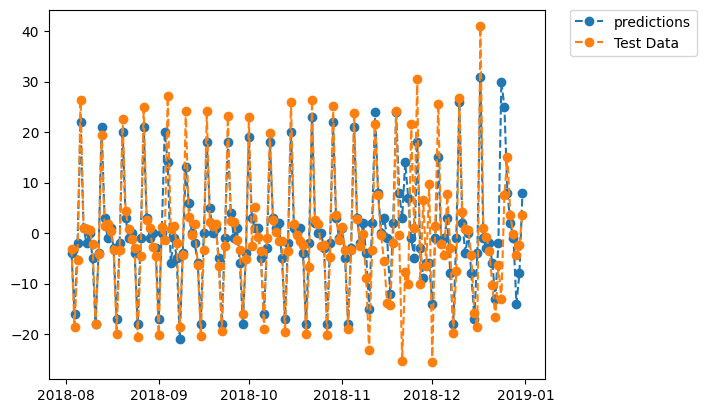

In [36]:
plt.plot(ARIMApred, linestyle='--', marker= 'o', label = 'predictions')
plt.plot(test, linestyle='--', marker= 'o', label = 'Test Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()